In [ ]:
pip install networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 
import itertools

In [2]:
!ls

Client.py	 Network.py   Simulation.py		  Train.py
man-user.png	 Protocol.py  Test for networkXLib.ipynb
mapFile		 __pycache__  Tests
mapFile.numbers  README.md    train.png


In [3]:
edgelist = pd.read_csv('mapFile/edgeList.csv')
nodelist = pd.read_csv('mapFile/Sheet 1-Vertices Positions.csv')

In [4]:
print(edgelist)

      Node1    Node2  distance
0        _1  Point_1        10
1        _1       _3        10
2   Point_1       _2        10
3        _2       _3        10
4        _2       _4        10
5        _4  Point_2        10
6        _4       _7        10
7        _4       _5        10
8        _5       _3        10
9        _5       _6         5
10       _5       _8        10
11       _8       _7        10
12       _8  Point_3         5
13  Point_3       _6        10


In [5]:
nodelist.head()

,Name,X,Y
0,Point_1,0,15
1,_1,0,5
2,_2,10,15
3,_3,10,5
4,Point_2,20,25


In [6]:
# Create empty graph
myGraph = nx.Graph()

In [7]:
# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    myGraph.add_edge(elrow[0], elrow[1], distance=elrow[2])

In [8]:
for i, nlrow in nodelist.iterrows():
    #myPathGraph.node[nlrow[0]] = nlrow[1:].to_dict()
    myGraph.node[nlrow['Name']].update(nlrow[1:].to_dict())

In [9]:
list(myGraph.edges(data=True))

[('_1', 'Point_1', {'distance': 10}),
 ('_1', '_3', {'distance': 10}),
 ('Point_1', '_2', {'distance': 10}),
 ('_3', '_2', {'distance': 10}),
 ('_3', '_5', {'distance': 10}),
 ('_2', '_4', {'distance': 10}),
 ('_4', 'Point_2', {'distance': 10}),
 ('_4', '_7', {'distance': 10}),
 ('_4', '_5', {'distance': 10}),
 ('_7', '_8', {'distance': 10}),
 ('_5', '_6', {'distance': 5}),
 ('_5', '_8', {'distance': 10}),
 ('_6', 'Point_3', {'distance': 10}),
 ('_8', 'Point_3', {'distance': 5})]

In [10]:
list(myGraph.nodes(data=True))

[('_1', {'X': 0, 'Y': 5}),
 ('Point_1', {'X': 0, 'Y': 15}),
 ('_3', {'X': 10, 'Y': 5}),
 ('_2', {'X': 10, 'Y': 15}),
 ('_4', {'X': 20, 'Y': 15}),
 ('Point_2', {'X': 20, 'Y': 25}),
 ('_7', {'X': 30, 'Y': 15}),
 ('_5', {'X': 20, 'Y': 5}),
 ('_6', {'X': 20, 'Y': 0}),
 ('_8', {'X': 30, 'Y': 5}),
 ('Point_3', {'X': 30, 'Y': 0})]

In [11]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], node[1]['Y']) for node in myGraph.nodes(data=True)}

In [12]:
node_positions

{'_1': (0, 5),
 'Point_1': (0, 15),
 '_3': (10, 5),
 '_2': (10, 15),
 '_4': (20, 15),
 'Point_2': (20, 25),
 '_7': (30, 15),
 '_5': (20, 5),
 '_6': (20, 0),
 '_8': (30, 5),
 'Point_3': (30, 0)}

In [13]:
# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items()))

{'_1': (0, 5),
 'Point_1': (0, 15),
 '_3': (10, 5),
 '_2': (10, 15),
 '_4': (20, 15),
 'Point_2': (20, 25),
 '_7': (30, 15),
 '_5': (20, 5),
 '_6': (20, 0),
 '_8': (30, 5),
 'Point_3': (30, 0)}

/home/vini/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


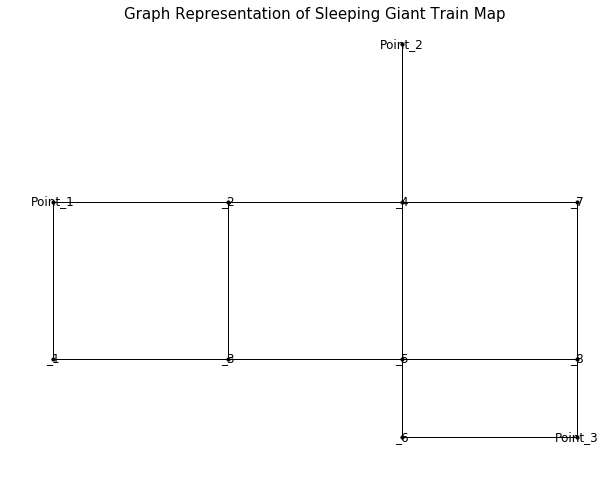

In [14]:
plt.figure(figsize=(8, 6))
nx.draw(myGraph, pos=node_positions,node_size=10, node_color='black',with_labels = True)
plt.title('Graph Representation of Sleeping Giant Train Map', size=15)
plt.show()

In [15]:
def get_shortest_paths_distances(graph, pairs, measure):
    """Compute shortest distance between each pair of nodes in a graph.  Return a dictionary keyed on node pairs (tuples)."""
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1],measure)
    return distances

In [16]:
my_nodes = list(myGraph.nodes)
# Compute all pairs of odd nodes. in a list of tuples
my_node_pairs = list(itertools.combinations(my_nodes, 2))

In [17]:
# Compute shortest paths.  Return a dictionary with node pairs keys and a single value equal to shortest path distance.
node_pairs_shortest_paths = get_shortest_paths_distances(myGraph, my_node_pairs, 'distance')

{('_1', 'Point_1'): 10,
 ('_1', '_3'): 10,
 ('_1', '_2'): 20,
 ('_1', '_4'): 30,
 ('_1', 'Point_2'): 40,
 ('_1', '_7'): 40,
 ('_1', '_5'): 20,
 ('_1', '_6'): 25,
 ('_1', '_8'): 30,
 ('_1', 'Point_3'): 35,
 ('Point_1', '_3'): 20,
 ('Point_1', '_2'): 10,
 ('Point_1', '_4'): 20,
 ('Point_1', 'Point_2'): 30,
 ('Point_1', '_7'): 30,
 ('Point_1', '_5'): 30,
 ('Point_1', '_6'): 35,
 ('Point_1', '_8'): 40,
 ('Point_1', 'Point_3'): 45,
 ('_3', '_2'): 10,
 ('_3', '_4'): 20,
 ('_3', 'Point_2'): 30,
 ('_3', '_7'): 30,
 ('_3', '_5'): 10,
 ('_3', '_6'): 15,
 ('_3', '_8'): 20,
 ('_3', 'Point_3'): 25,
 ('_2', '_4'): 10,
 ('_2', 'Point_2'): 20,
 ('_2', '_7'): 20,
 ('_2', '_5'): 20,
 ('_2', '_6'): 25,
 ('_2', '_8'): 30,
 ('_2', 'Point_3'): 35,
 ('_4', 'Point_2'): 10,
 ('_4', '_7'): 10,
 ('_4', '_5'): 10,
 ('_4', '_6'): 15,
 ('_4', '_8'): 20,
 ('_4', 'Point_3'): 25,
 ('Point_2', '_7'): 20,
 ('Point_2', '_5'): 20,
 ('Point_2', '_6'): 25,
 ('Point_2', '_8'): 30,
 ('Point_2', 'Point_3'): 35,
 ('_7', '_5'): 